In [1]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\Stats and ML - 8AM\\New folder'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the data
dataset = pd.read_excel('Employee_Data.xls')

In [4]:
# first few observation
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [5]:
# last few observation
dataset.tail()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158
99,100,Avye,Davidson,Accounting,44.0,21.0,91645


In [6]:
# Q: how many data-points and features we have ?

dataset.shape

(100, 7)

In [7]:
# Q : What are the columns names given in the dataset ?
dataset.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [8]:
# Q : How many missing data are there in dataset ?

dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [9]:
# Q : How much percent missing data are there in dataset ?

dataset.isnull().sum() / len(dataset)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [10]:
# Q : how to identify data type for missing variable ?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [11]:
# Department   81 non-null     object
# approach - model
# Q : How many data points are given in the class "Department" ?

dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [37]:
dataset['Department'].mode()

0    Sales and Marketing
Name: Department, dtype: object

In [12]:
# handling char/object missing variable

dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')

In [13]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      0
Age            18
Experience     10
Salary          0
dtype: int64

In [14]:
dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

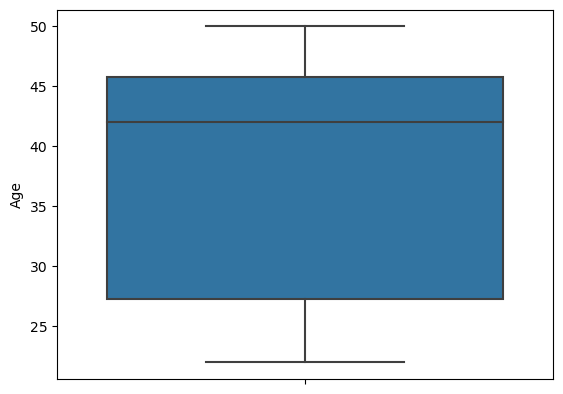

In [16]:
# Age          82 non-null     float64 - There is no outlier found - approach : mean
# Experience   90 non-null     float64 - There is no outlier found - approach : mean
# Both Age and Experience are numeric value, hence we have to do boxplot first to check outlier and then will decide whether we have to use Mean or Median

sns.boxplot(y='Age', data=dataset)
plt.show()

In [18]:
dataset['Age'].mean()

37.97560975609756

In [29]:
dataset['Age'].describe()

count    100.000000
mean      37.975610
std        8.606992
min       22.000000
25%       30.000000
50%       39.500000
75%       44.250000
max       50.000000
Name: Age, dtype: float64

In [19]:
dataset['Age'].median()

42.0

In [20]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

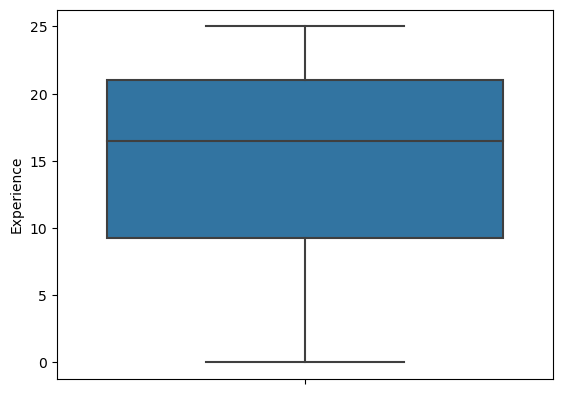

In [17]:
sns.boxplot(y='Experience', data=dataset)
plt.show()

In [21]:
dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].mean())

In [22]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   100 non-null    object 
 4   Age          100 non-null    float64
 5   Experience   100 non-null    float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


# Encoding Concept

### 1st part - Label encoder

In [39]:
dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [40]:
dataset['Department'] = dataset['Department'].astype('category')
dataset['Department'] = dataset['Department'].cat.codes

In [41]:
dataset.head(20)

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,2,28.0,3.000000,32889
1,2,Sheila,Garza,2,22.0,1.000000,15944
2,3,John,Bryant,1,22.0,1.000000,40343
3,4,Christian,Farley,1,22.0,1.000000,19018
4,5,Colorado,Bowen,0,27.0,0.000000,24795
5,6,Elijah,Matthews,0,26.0,5.000000,15387
6,7,Bo,Mcleod,1,24.0,6.000000,34117
7,8,Zena,Melendez,1,29.0,2.000000,16099
8,9,Tucker,Michael,2,29.0,5.000000,42105
9,10,Lucas,Rowe,1,30.0,6.000000,11891


In [42]:
dataset['Department'].value_counts()

2    49
0    27
1    24
Name: Department, dtype: int64

# Part 2 - One Hot Encoder

In [43]:
dataset = pd.get_dummies(dataset, columns=['Department'])

In [44]:
dataset.head(20)

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_0,Department_1,Department_2
0,1,Joy,Bass,28.0,3.000000,32889,0,0,1
1,2,Sheila,Garza,22.0,1.000000,15944,0,0,1
2,3,John,Bryant,22.0,1.000000,40343,0,1,0
3,4,Christian,Farley,22.0,1.000000,19018,0,1,0
4,5,Colorado,Bowen,27.0,0.000000,24795,1,0,0
5,6,Elijah,Matthews,26.0,5.000000,15387,1,0,0
6,7,Bo,Mcleod,24.0,6.000000,34117,0,1,0
7,8,Zena,Melendez,29.0,2.000000,16099,0,1,0
8,9,Tucker,Michael,29.0,5.000000,42105,0,0,1
9,10,Lucas,Rowe,30.0,6.000000,11891,0,1,0


# Part 3 - Dummy Variable (n-1)

In [45]:
dataset = dataset.drop(['Department_0'], axis=1) # axis=1 means columnwise

In [46]:
dataset.head()

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_1,Department_2
0,1,Joy,Bass,28.0,3.0,32889,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,1
2,3,John,Bryant,22.0,1.0,40343,1,0
3,4,Christian,Farley,22.0,1.0,19018,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,0,0


In [ ]:
dataset = dataset.drop(['Employee Id', ''	First Name	Last Name], axis=1)

In [27]:
titanic = pd.read_excel('OutlierData.xlsx')
titanic.head()

,Department,Age,Experience
0,HR,21,1
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11


<AxesSubplot:ylabel='Experience'>

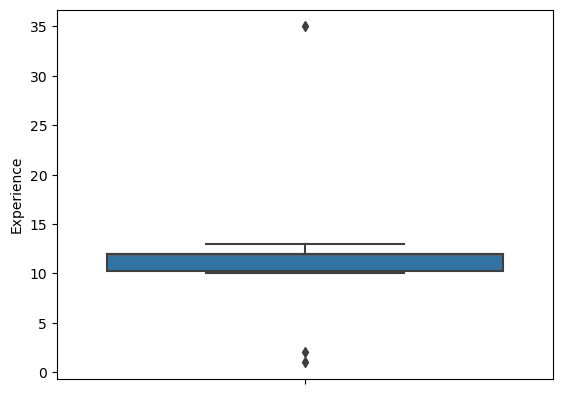

In [28]:
sns.boxplot(y='Experience', data=titanic)

In [30]:
titanic.describe()

,Age,Experience
count,10.000000,10.000000
mean,34.400000,12.000000
std,8.355969,9.165151
min,21.000000,1.000000
25%,32.250000,10.250000
50%,33.500000,12.000000
75%,34.750000,12.000000
max,55.000000,35.000000


In [31]:
Q1 = 10.250000
Q3 = 12.000000
IQR = Q3 - Q1

In [34]:
min1 = Q1 - 1.5*IQR
max1 = Q3 + 1.5*IQR

In [35]:
print(min1)
print(max1)

7.625
14.625
